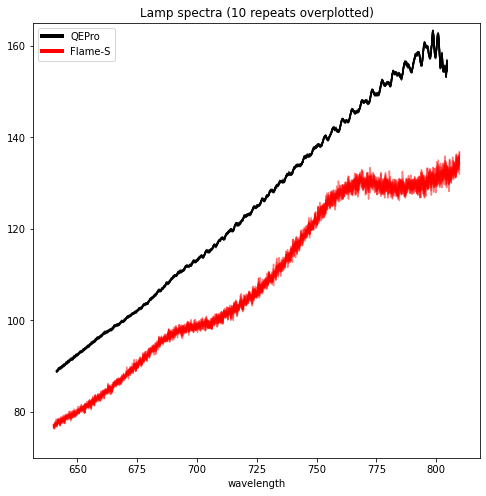

In [1]:
from piccololite import read_piccolo_sequence, RadiometricCorrection, sequence_to_datasets
import os

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

root = 'test/unit/data/'
cals = ['S_FLMS01691_CalCoeffs.csv', 'S_QEP00984_CalCoeffs.csv']
cal_paths = [os.path.join(root, x) for x in cals]
                          
pic_seq = read_piccolo_sequence(root)
rc = RadiometricCorrection(cal_paths)
corrected = rc.transform(pic_seq)

# Plotting
custom_lines = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='r', lw=4)]

f, ax = plt.subplots(figsize=(8,8))
for CAPTURE in corrected:
    corrected[CAPTURE]['S_FLMS01691']['Downwelling'].sel(wavelength=slice(640,810)).plot(c='r', ax=ax, alpha=.5)
    
for CAPTURE in corrected:
    corrected[CAPTURE]['S_QEP00984']['Downwelling'].plot(c='k', ax=ax, alpha=.5)
    
ax.set_ylim(70,165)
ax.legend(custom_lines, ['QEPro','Flame-S'])
ax.set_title('Lamp spectra (10 repeats overplotted)')

plt.savefig('plots/example.png', dpi=150)

In [ ]:
f, ax = plt.subplots(figsize=(8,8))
for CAPTURE in corrected:
    corrected[CAPTURE]['S_FLMS01691']['Downwelling'].sel(wavelength=slice(640,810)).plot(c='r', ax=ax, alpha=.5)
    
for CAPTURE in corrected:
    corrected[CAPTURE]['S_QEP00984']['Downwelling'].plot(c='k', ax=ax, alpha=.5)
    
ax.set_ylim(-1,1)
ax.legend(custom_lines, ['QEPro','Flame-S'])
ax.set_title('Dark spectra (10 repeats overplotted)')

plt.savefig('plots/example.png', dpi=150)

In [ ]:
print('b000000_s000000_dark.pico:')
print(
    'QE Pro Dark Noise: {:.4f}\nFlame-S Dark Noise {:.4f}'.format(
        float(corrected['b000000_s000000_dark.pico']['S_QEP00984']['Downwelling'].std()),
        float(corrected['b000000_s000000_dark.pico']['S_FLMS01691']['Downwelling'].std()))
)

In [ ]:
print('b000000_s000009_dark.pico:')
print(
    'QE Pro Dark Noise: {:.4f}\nFlame-S Dark Noise {:.4f}'.format(
        float(corrected['b000000_s000009_dark.pico']['S_QEP00984']['Downwelling'].std()),
        float(corrected['b000000_s000009_dark.pico']['S_FLMS01691']['Downwelling'].std()))
)

In [ ]:
sequence_to_datasets(corrected)['S_QEP00984'].data_vars

In [ ]:
sequence_to_datasets(corrected)['S_QEP00984']['b000000_s000007_light_S_QEP00984_Downwelling'].attrs